In [4]:
from sklearn import datasets
import numpy as np 

N,D = 200,2 


X,y = datasets.make_classification(
    n_samples=N,
    n_features=D,
    n_informative=2, 
    n_redundant=0,
    random_state=1
)

X = np.reshape(X, (N,D))
y = np.reshape(y, (N,1))

print('X_shape = ', X.shape, '\ny.shape = ', y.shape)

X_shape =  (200, 2) 
y.shape =  (200, 1)


In [5]:
import pandas as pd
df = pd.DataFrame(
    {
        'x_1': X[:, 0],
        'x_2': X[:, 1],
        'label': ['m' if y_i> 0 else 'k' for y_i in y]

    },
    index = list(range(N))
)
df

,x_1,x_2,label
0,-1.273999,-3.214410,m
1,-1.235762,-3.997952,k
2,1.854004,0.726989,m
3,0.720732,-0.026282,k
4,2.255234,0.253566,m
...,...,...,...
195,-0.992109,-1.392891,k
196,1.478505,-1.193195,k
197,-1.255352,1.209983,m
198,-0.863952,-0.306398,k


In [6]:
import plotly.express as px
px.scatter(df, x='x_1', y='x_2', color='label')

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [8]:
w = np.array([1,2])
b= 1
w = np.reshape(w, (D,1))

def model(x,w,b):
    logits = np.matmul(x,w) + b
    return sigmoid(logits)

In [9]:
y_pred = model(X, w, b)
y_pred.shape

(200, 1)

In [10]:
y_pred_class = np.where(y_pred>0.5, 1, 0)

In [11]:
def plot_figure(w, b):
    import plotly.graph_objects as go

    def get_points(w, b, x1, x2):
        A, B = w[0,0], w[1,0]
        C= b 
        return {
            'x': [x1,x2],
            'y': [(C-A*x1)/B, (C-A*x2)/B]
        }
    
    fig1 = px.scatter(df, x='x_1', y='x_2', color='label')
    fig2 = go.Figure(go.Scatter(**get_points(w, b, -2, 4), name='brzeg'))

    return go.Figure(data=fig1.data +fig2.data)

plot_figure(w,b)

In [12]:
# funkcja straty - jak dobry jest model
# chcemy minimalizować funkcję straty 
 
# cross entropy 
def cross_entropy(y_pred, y):
    return -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

In [13]:
def compute_cost(X,y,w,b):
    y_pred = model(X, w, b)
    return cross_entropy(y_pred, y)


In [14]:
def f(b):
    return compute_cost(X, y, w,b)

f(b), f(-1), f(0), f(5), f(1/9)

(0.5468080282817493,
 0.5114185405594789,
 0.48269659835493883,
 1.6003696159032232,
 0.48531278083301205)

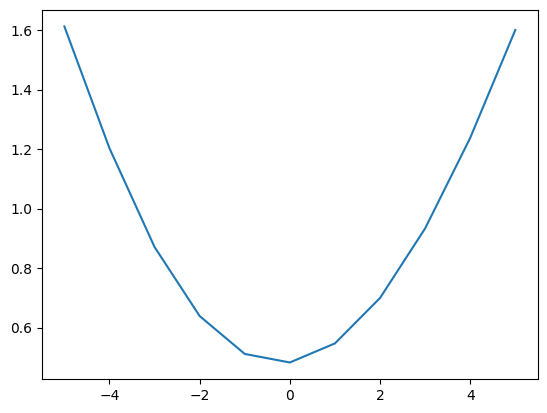

In [15]:
import matplotlib.pyplot as plt 
bb = list(range(-5,6))
f = [f(i) for i in bb]
plt.plot(bb, f)

In [16]:
def compute_gradient(X, y, w, b):
    n = len(X)
    y_pred = model(X, w, b)
    error = y_pred - y 
    dw = 1/n * np.matmul(X.T, error)
    db = 1/n * np.sum(error)
    return dw, db

In [17]:
compute_gradient(X, y, w, b)

(array([[ 0.20392613],
        [-0.02673634]]),
 0.10920929261669864)

In [18]:
def step_gradient(data_x, data_y, w_current, b_current, alpha):
    w_gradient, b_gradient = compute_gradient(data_x, data_y, w_current, b_current)

    w_update = w_current - alpha*w_gradient
    b_update = b_current - alpha*b_gradient

    return w_update, b_update

In [19]:
w_before, b_before = w, b

cost_before = compute_cost(X, y, w_before, b_before)

w_after, b_after = step_gradient(X, y, w_before, b_before, alpha=1)
cost_after = compute_cost(X, y, w_after, b_after)

print(f'cost_before = {cost_before:.3f}')
print(f'cost_after = {cost_after:.3f}')

cost_before = 0.547
cost_after = 0.496


In [20]:
plot_figure(w_before, b_before)

In [21]:
def gradient_descent(data_x, data_y, w_init, b_init, alpha, num_epochs):

    w = w_init
    b = b_init

    cost_history = []

    w_history = []
    b_history = []

    for i in range(num_epochs):
        cost_history.append(compute_cost(data_x, data_y, w, b))
        w, b = step_gradient(data_x, data_y, w, b, alpha)
        w_history.append(w)
        b_history.append(b)
    
    return cost_history, w_history, b_history

In [22]:
num_epochs = 30
cost_history, w_history, b_history = gradient_descent(
    X, y, w_init=w, b_init=b, alpha=1, num_epochs=num_epochs
)

fig = px.line(x=list(range(num_epochs)), y=cost_history)
fig.update_layout(xaxis_title='nr epoki', yaxis_title='MSE')
fig

In [23]:
w_history[-1], b_history[-1]

(array([[-0.1281306 ],
        [ 2.10506928]]),
 -0.11394551296330463)

In [24]:
compute_cost(X, y, w_history[-1], b_history[-1])


0.3461751174673129

In [25]:
plot_figure(w_history[-1], b_history[-1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_true, y_pred)
